In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [155]:
iris = datasets.load_iris()

In [156]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,random_state=40,test_size=0.3)

In [157]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [158]:
iris_df = pd.DataFrame(iris.data)
iris_df.rename(columns={0:"sepal_length(cm)",1:"sepal_width(cm)",2:"petal_length(cm)",3:"petal_width(cm)"},inplace=True)

In [159]:
iris_df["target"] = iris.target
for i in range(len(iris_df["target"])):
  if(iris_df["target"][i] == 0):
    iris_df["target"][i] = "setosa"
  elif(iris_df["target"][i] == 1):
    iris_df["target"][i] = "versicolor"
  elif(iris_df["target"][i] == 2):
    iris_df["target"][i] = "virginica"


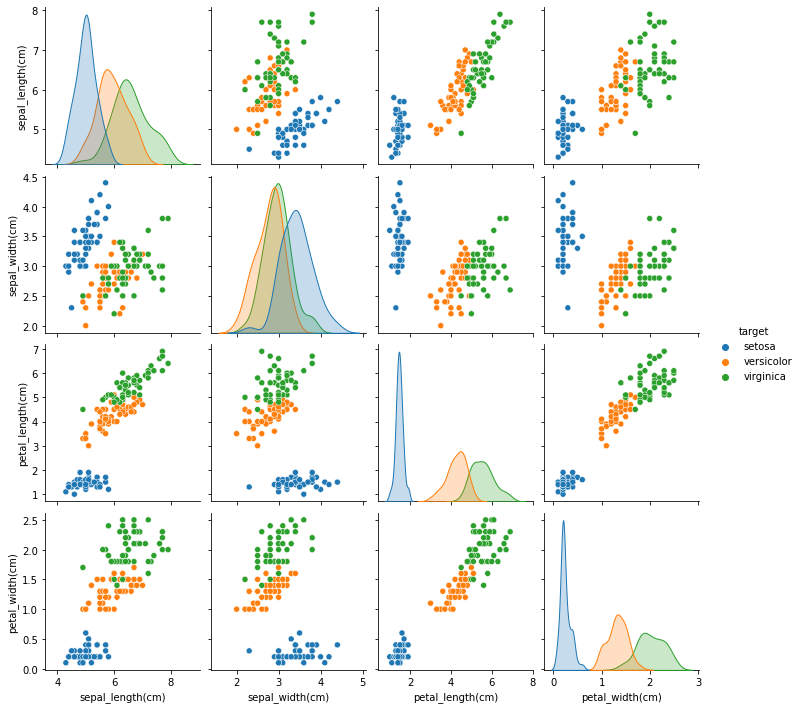

In [160]:
sns.pairplot(iris_df,hue="target")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


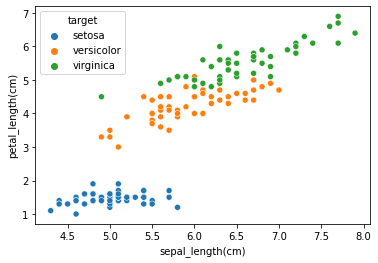

In [161]:
sns.scatterplot(iris_df["sepal_length(cm)"],iris_df['petal_length(cm)'],hue=iris_df["target"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


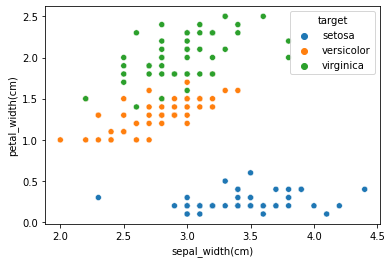

In [162]:
sns.scatterplot(iris_df["sepal_width(cm)"],iris_df['petal_width(cm)'],hue=iris_df["target"])

In [163]:
clf = SVC(kernel="rbf",degree=3,random_state=0,C=0.5)
clf.fit(x_train,y_train)


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [164]:
y_pred = clf.predict(x_test)

In [165]:
metrics.accuracy_score(y_pred,y_test)

0.9555555555555556

In [166]:
metrics.confusion_matrix(y_pred,y_test)

array([[16,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 13]])

In [167]:
from mlxtend.plotting import plot_decision_regions

In [168]:
clf.fit(np.array(iris_df[["sepal_length(cm)","petal_length(cm)"]]),np.array(iris.target))

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


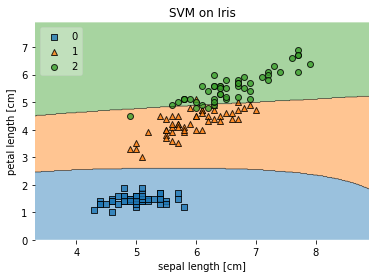

In [169]:
plot_decision_regions(np.array(iris_df[["sepal_length(cm)","petal_length(cm)"]]),np.array(iris.target),clf=clf,legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()